## Preparing Data

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
train = '/content/drive/MyDrive/Colab Notebooks/CS515/hw3/mnist_train.csv'
test = '/content/drive/MyDrive/Colab Notebooks/CS515/hw3/mnist_test.csv'

In [ ]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [ ]:
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_df.drop("label", axis=1).values
y = train_df["label"].values
X = X / 255.0 # Scale the pixel values to the range [0,1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
import torch
from torch.utils.data import DataLoader, TensorDataset
# tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.int64)
# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

## 1.1) linear autoencoder

In [ ]:
class LinearAutoencoder(nn.Module):
    def __init__(self, input_size, k):
        super(LinearAutoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, k)
        self.decoder = nn.Linear(k, input_size)
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Training autoencoder with k = 10
Epoch [1/15], Train Loss: 0.0413, Val Loss: 0.0424
Epoch [2/15], Train Loss: 0.0378, Val Loss: 0.0345
Epoch [3/15], Train Loss: 0.0351, Val Loss: 0.0338
Epoch [4/15], Train Loss: 0.0329, Val Loss: 0.0338
Epoch [5/15], Train Loss: 0.0330, Val Loss: 0.0338
Epoch [6/15], Train Loss: 0.0337, Val Loss: 0.0338
Epoch [7/15], Train Loss: 0.0335, Val Loss: 0.0338
Epoch [8/15], Train Loss: 0.0368, Val Loss: 0.0338
Epoch [9/15], Train Loss: 0.0339, Val Loss: 0.0338
Epoch [10/15], Train Loss: 0.0354, Val Loss: 0.0337
Epoch [11/15], Train Loss: 0.0354, Val Loss: 0.0337
Epoch [12/15], Train Loss: 0.0347, Val Loss: 0.0338
Epoch [13/15], Train Loss: 0.0336, Val Loss: 0.0337
Epoch [14/15], Train Loss: 0.0338, Val Loss: 0.0337
Epoch [15/15], Train Loss: 0.0343, Val Loss: 0.0338
Training autoencoder with k = 50
Epoch [1/15], Train Loss: 0.0150, Val Loss: 0.0143
Epoch [2/15], Train Loss: 0.0116, Val Loss: 0.0125
Epoch [3/15], Train Loss: 0.0125, Val Loss: 0.0123
Epoch [4/1

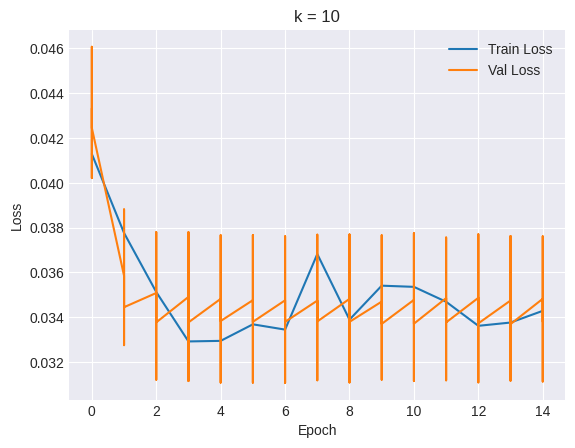

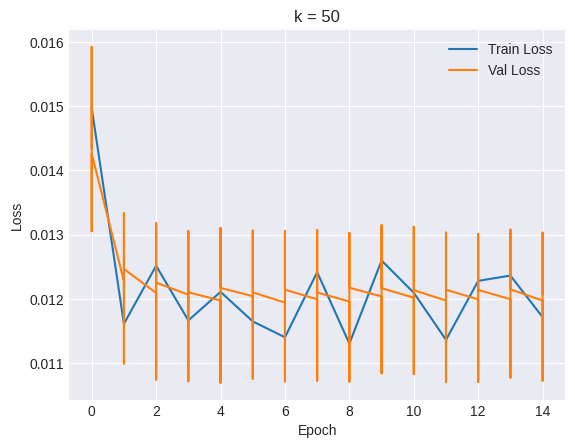

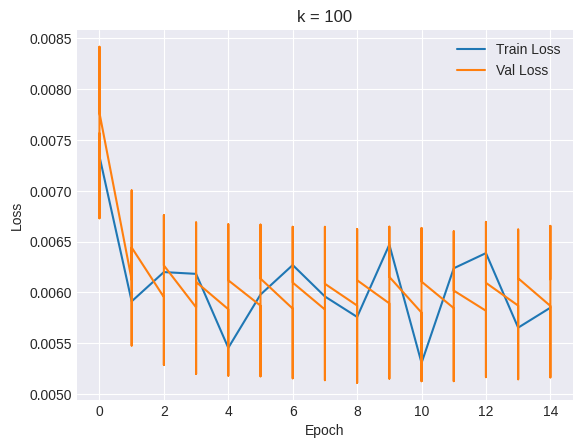

In [ ]:
input_size = 784
num_epochs = 15
import matplotlib.pyplot as plt
# List of k values
k_values = [10, 50, 100]
loss_dict = {}
# Training loop
for k in k_values:
    print(f"Training autoencoder with k = {k}")
    autoencoder = LinearAutoencoder(input_size, k)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    epoch_list_train = []
    loss_list_train = []
    epoch_list_val = []
    loss_list_val = []
    for epoch in range(num_epochs):
        for data, _ in train_loader:
            outputs = autoencoder(data) # Forward pass
            loss = criterion(outputs, data) # loss
            optimizer.zero_grad() # Backward
            loss.backward()
            optimizer.step() # weight update
        epoch_list_train.append(epoch)
        loss_list_train.append(loss.item())
        with torch.no_grad(): # validation loss
            for data, _ in val_loader:
                outputs = autoencoder(data)
                loss_val = criterion(outputs, data)
                loss_list_val.append(loss_val.item())
                epoch_list_val.append(epoch)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {loss_val.item():.4f}")
    loss_dict[k] = {"epoch_list_train": epoch_list_train, "loss_list_train": loss_list_train, "epoch_list_val": epoch_list_val, "loss_list_val": loss_list_val}
    torch.save(autoencoder.state_dict(), f"autoencoder_k_{k}.pth") # to save the trained autoencoder model

for k in k_values:
    loss_dict_k = loss_dict[k]
    fig, ax = plt.subplots()
    ax.plot(loss_dict_k["epoch_list_train"], loss_dict_k["loss_list_train"], label="Train Loss")
    ax.plot(loss_dict_k["epoch_list_val"], loss_dict_k["loss_list_val"], label="Val Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title(f"k = {k}")
    ax.legend()
    plt.show()


## 1.2)

<ipython-input-39-dc2b4bd37f13>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


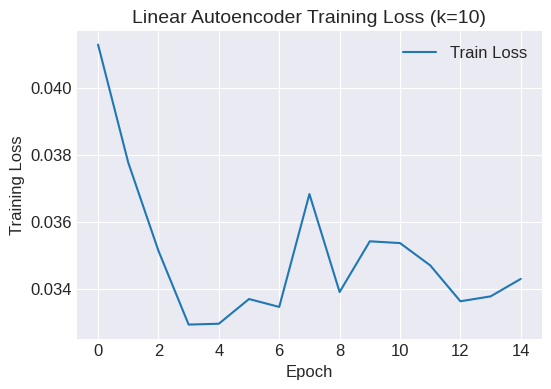

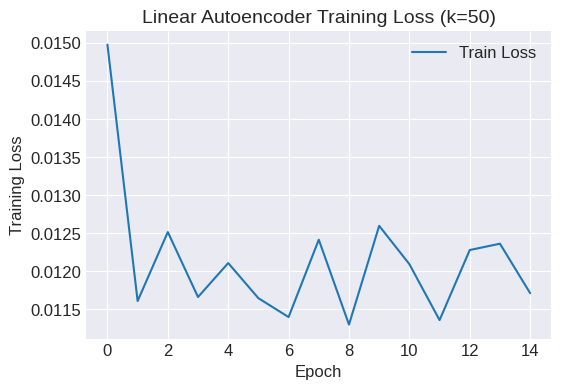

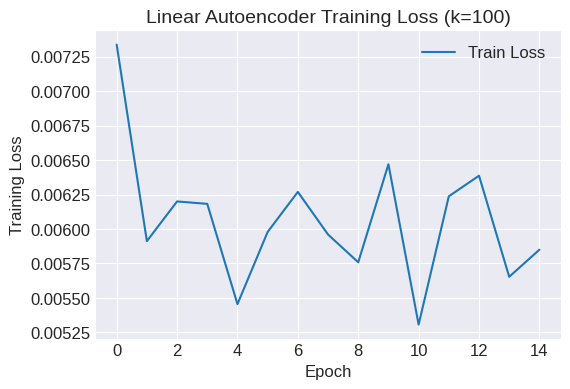

In [ ]:
import matplotlib.pyplot as plt
# List of k values
k_values = [10, 50, 100]
plt.style.use('seaborn-darkgrid')

for k in k_values:
    epoch_list_train = loss_dict[k]["epoch_list_train"]
    loss_list_train = loss_dict[k]["loss_list_train"]
    fig, ax = plt.subplots()
    ax.plot(epoch_list_train, loss_list_train, label="Train Loss")
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel("Training Loss", fontsize=12)
    ax.set_title(f"Linear Autoencoder Training Loss (k={k})", fontsize=14)
    ax.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    fig.set_size_inches(6, 4)
    fig.savefig(f"train_loss_k_{k}.pdf", bbox_inches="tight")
    plt.show()


Training images:


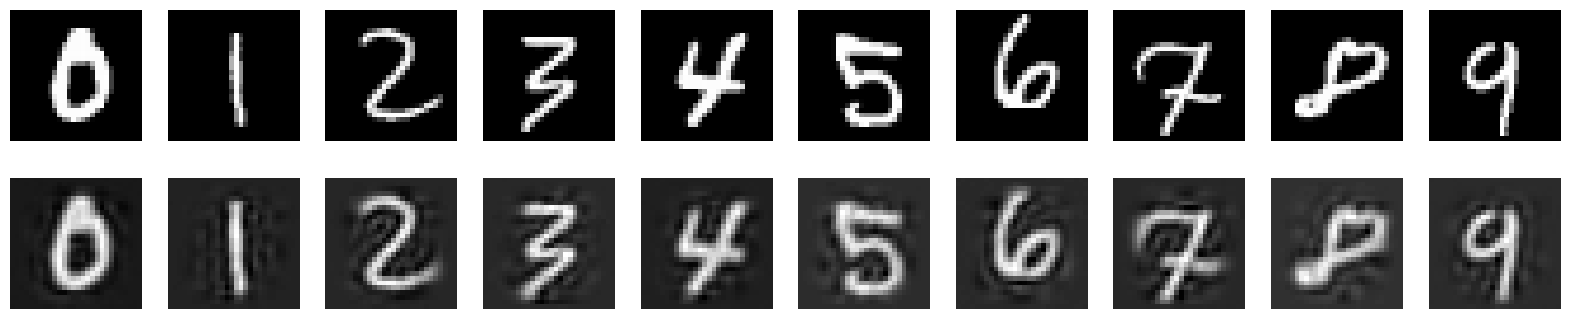

Test images:


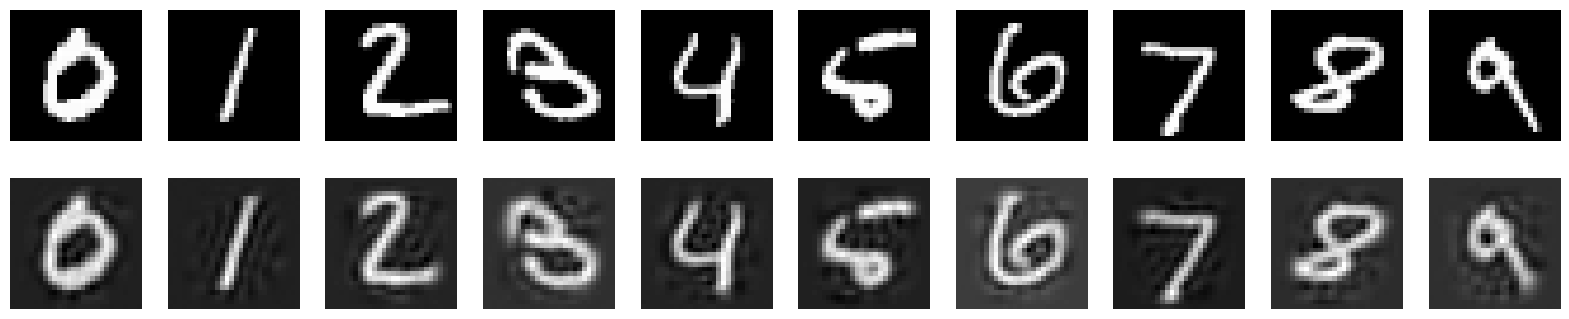

In [ ]:
import numpy as np
def display_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n) # reconstructed ones
        plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
#  10 training images, one from each digit
train_images = []
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    train_images.append(X_train[idx])
#  10 test images, one from each digit
test_images = []
for i in range(10):
    idx = np.where(test_df["label"] == i)[0][0]
    test_images.append(test_df.drop("label", axis=1).values[idx] / 255.0)
k_chosen = 100
autoencoder_chosen = LinearAutoencoder(input_size, k_chosen)
autoencoder_chosen.load_state_dict(autoencoder.state_dict())
train_images_tensor = torch.tensor(train_images, dtype=torch.float32)
test_images_tensor = torch.tensor(test_images, dtype=torch.float32)
with torch.no_grad():
    reconstructed_train = autoencoder_chosen(train_images_tensor).numpy()
    reconstructed_test = autoencoder_chosen(test_images_tensor).numpy()
print("Training images:")
display_images(train_images, reconstructed_train)

print("Test images:")
display_images(test_images, reconstructed_test)

In [ ]:

X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values
X_test = X_test / 255.0
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
# autoencoder on the test data
test_loss_dict = {}
for k in k_values:
    autoencoder = LinearAutoencoder(input_size, k)
    autoencoder.load_state_dict(torch.load(f"autoencoder_k_{k}.pth"))
    criterion = nn.MSELoss()
    test_loss_list = []
    with torch.no_grad():
        for data, _ in test_loader:
            outputs = autoencoder(data)
            test_loss = criterion(outputs, data)
            test_loss_list.append(test_loss.item())
    test_loss_dict[k] = np.mean(test_loss_list)
    print(f"Test Loss for k = {k}: {test_loss_dict[k]:.4f}")


Test Loss for k = 10: 0.0341
Test Loss for k = 50: 0.0116
Test Loss for k = 100: 0.0058


## Optional Visualizations

<Figure size 640x480 with 0 Axes>

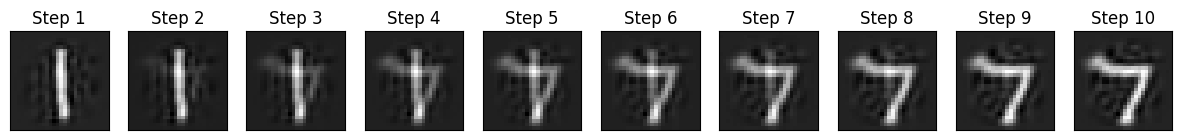

<Figure size 640x480 with 0 Axes>

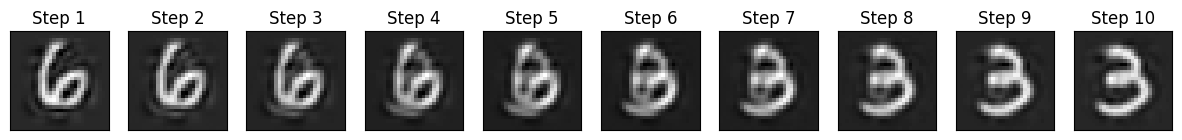

<Figure size 640x480 with 0 Axes>

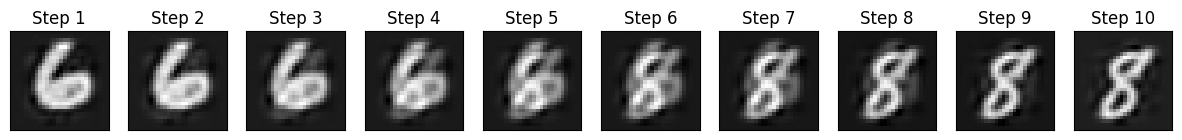

<Figure size 640x480 with 0 Axes>

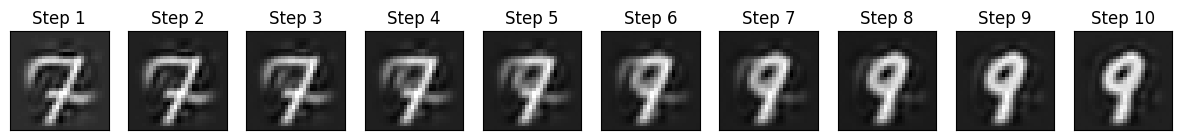

<Figure size 640x480 with 0 Axes>

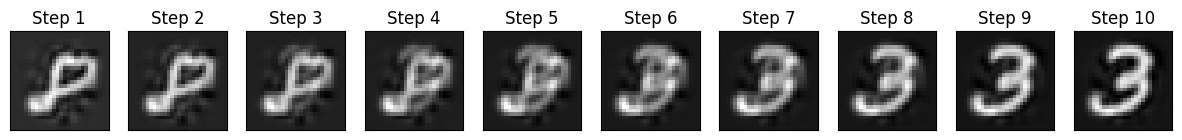

<Figure size 640x480 with 0 Axes>

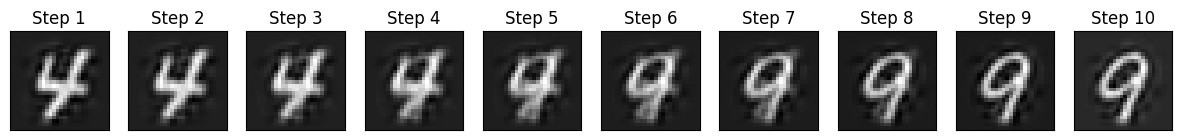

<Figure size 640x480 with 0 Axes>

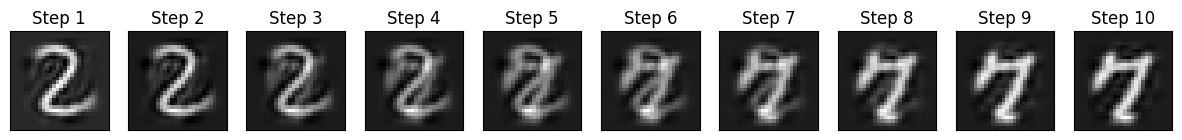

<Figure size 640x480 with 0 Axes>

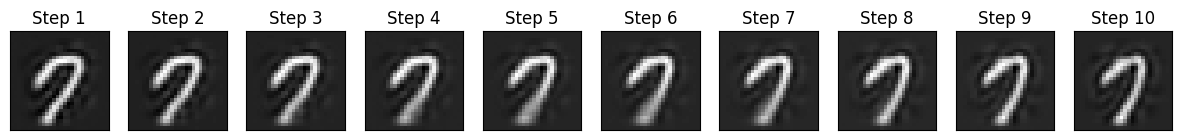

<Figure size 640x480 with 0 Axes>

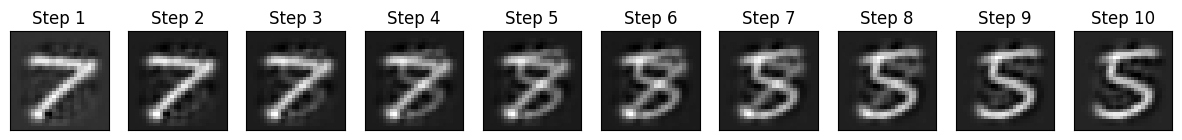

<Figure size 640x480 with 0 Axes>

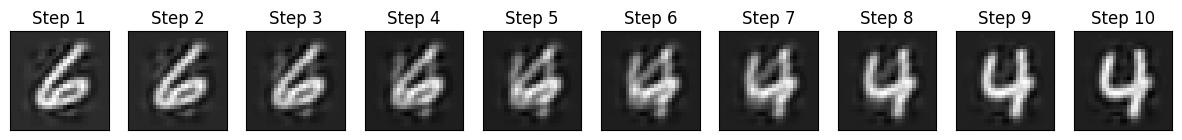

In [ ]:
#Interpolate linearly between the codes of training and validation images and visualize the transition:
def interpolate_and_decode(train_code, val_code, num_steps=10):
    alpha = torch.linspace(0, 1, num_steps).view(-1, 1)
    interpolated_codes = (1 - alpha) * train_code + alpha * val_code
    with torch.no_grad():
        decoded_images = autoencoder.decoder(interpolated_codes).reshape(-1, 28, 28)
    return decoded_images
def visualize_interpolation(images, titles, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))
    for i in range(num_images):
        img = images[i].detach().numpy().reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()
with torch.no_grad():
    train_codes = autoencoder.encoder(train_images)
    val_codes = autoencoder.encoder(val_images)
for i in range(10):
    decoded_images = interpolate_and_decode(train_codes[i], val_codes[i])
    plt.figure()
    plt.suptitle(f"Interpolation {i+1}")
    visualize_interpolation(decoded_images, [f"Step {i+1}" for i in range(10)])



Random images:


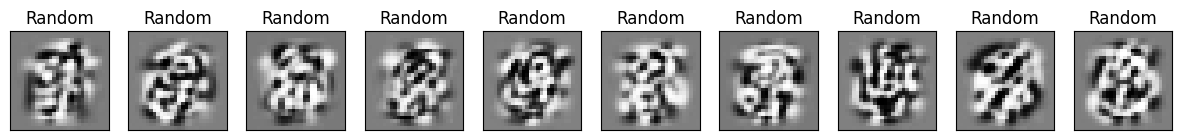

In [ ]:
def visualize_images(images, titles, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))
    for i in range(num_images):
        img = images[i].detach().numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()
random_codes = torch.randn(10, k)
with torch.no_grad():
    decoded_random = torch.sigmoid(autoencoder.decoder(random_codes)).reshape(-1, 28, 28)
# the decoded random images
print("Random images:")
visualize_images(decoded_random, ["Random"] * 10)

## 1.3

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
class NonLinearAutoencoder(nn.Module):
    def __init__(self, input_size, k):
        super(NonLinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, k),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(k, input_size),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Training autoencoder with k = 10
Epoch [1/15], Train Loss: 0.0521, Val Loss: 0.0531
Epoch [2/15], Train Loss: 0.0449, Val Loss: 0.0448
Epoch [3/15], Train Loss: 0.0436, Val Loss: 0.0417
Epoch [4/15], Train Loss: 0.0430, Val Loss: 0.0404
Epoch [5/15], Train Loss: 0.0424, Val Loss: 0.0398
Epoch [6/15], Train Loss: 0.0420, Val Loss: 0.0394
Epoch [7/15], Train Loss: 0.0431, Val Loss: 0.0390
Epoch [8/15], Train Loss: 0.0390, Val Loss: 0.0388
Epoch [9/15], Train Loss: 0.0365, Val Loss: 0.0390
Epoch [10/15], Train Loss: 0.0403, Val Loss: 0.0389
Epoch [11/15], Train Loss: 0.0385, Val Loss: 0.0387
Epoch [12/15], Train Loss: 0.0436, Val Loss: 0.0386
Epoch [13/15], Train Loss: 0.0412, Val Loss: 0.0386
Epoch [14/15], Train Loss: 0.0416, Val Loss: 0.0386
Epoch [15/15], Train Loss: 0.0379, Val Loss: 0.0385
Training autoencoder with k = 50
Epoch [1/15], Train Loss: 0.0210, Val Loss: 0.0223
Epoch [2/15], Train Loss: 0.0154, Val Loss: 0.0135
Epoch [3/15], Train Loss: 0.0101, Val Loss: 0.0105
Epoch [4/1

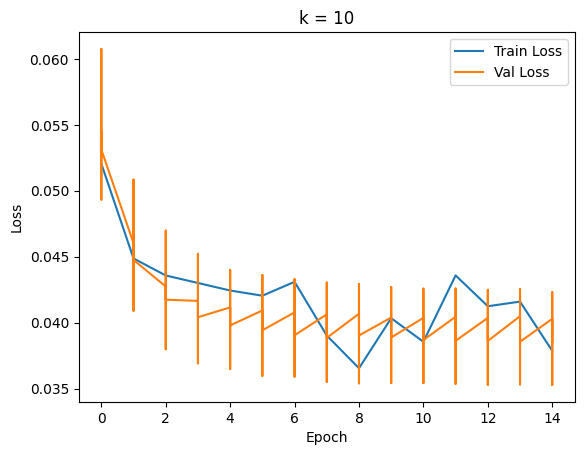

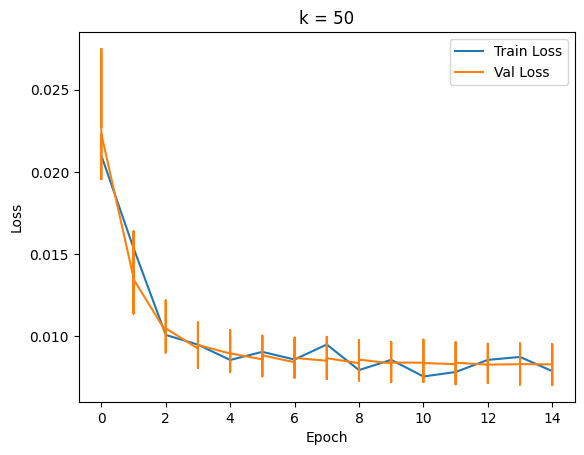

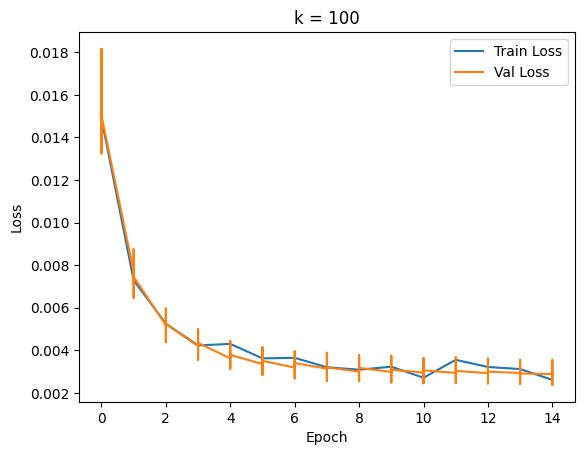

In [ ]:
input_size = 784
num_epochs = 15
import matplotlib.pyplot as plt
k_values = [10, 50, 100]
loss_dict = {}
for k in k_values:
    print(f"Training autoencoder with k = {k}")
    autoencoder = NonLinearAutoencoder(input_size, k)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    epoch_list_train = []
    loss_list_train = []
    epoch_list_val = []
    loss_list_val = []
    for epoch in range(num_epochs):
        for data, _ in train_loader:
            outputs = autoencoder(data)
            loss = criterion(outputs, data)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        epoch_list_train.append(epoch)
        loss_list_train.append(loss.item())
        with torch.no_grad():
            for data, _ in val_loader:
                outputs = autoencoder(data)
                loss_val = criterion(outputs, data)
                loss_list_val.append(loss_val.item())
                epoch_list_val.append(epoch)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {loss_val.item():.4f}")
    loss_dict[k] = {"epoch_list_train": epoch_list_train, "loss_list_train": loss_list_train, "epoch_list_val": epoch_list_val, "loss_list_val": loss_list_val}
    torch.save(autoencoder.state_dict(), f"nonlinear_autoencoder_k_{k}.pth")

for k in k_values:
    loss_dict_k = loss_dict[k]
    fig, ax = plt.subplots()
    ax.plot(loss_dict_k["epoch_list_train"], loss_dict_k["loss_list_train"], label="Train Loss")
    ax.plot(loss_dict_k["epoch_list_val"], loss_dict_k["loss_list_val"], label="Val Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title(f"k = {k}")
    ax.legend()
    plt.show()


<ipython-input-8-5bca595544aa>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


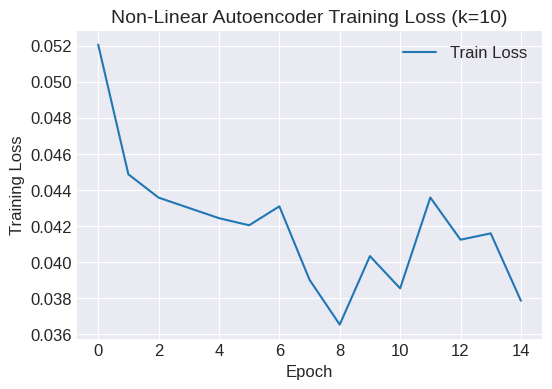

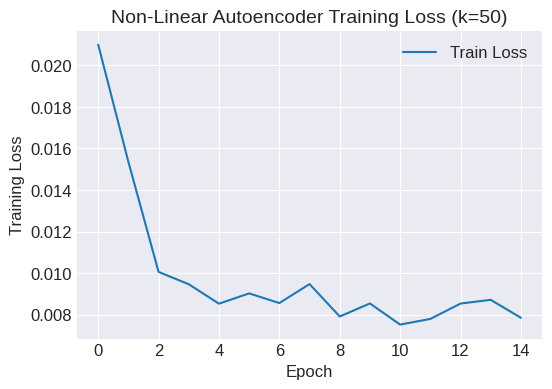

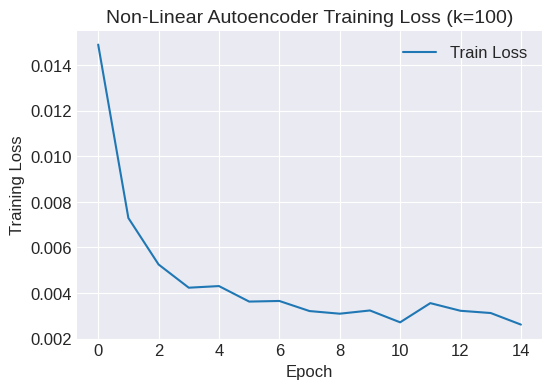

In [ ]:
import matplotlib.pyplot as plt
k_values = [10, 50, 100]
plt.style.use('seaborn-darkgrid')

for k in k_values:
    epoch_list_train = loss_dict[k]["epoch_list_train"]
    loss_list_train = loss_dict[k]["loss_list_train"]
    fig, ax = plt.subplots()
    ax.plot(epoch_list_train, loss_list_train, label="Train Loss")
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel("Training Loss", fontsize=12)
    ax.set_title(f"Non-Linear Autoencoder Training Loss (k={k})", fontsize=14)
    ax.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    fig.set_size_inches(6, 4)
    fig.savefig(f"train_loss_k_{k}.pdf", bbox_inches="tight")
    plt.show()


In [ ]:
X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values
X_test = X_test / 255.0
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
test_loss_dict = {}
for k in k_values:
    autoencoder = NonLinearAutoencoder(input_size, k)
    autoencoder.load_state_dict(torch.load(f"nonlinear_autoencoder_k_{k}.pth")) # Assuming you saved the trained models as "autoencoder_k_{k}.pth"
    criterion = nn.MSELoss()

    test_loss_list = []
    with torch.no_grad():
        for data, _ in test_loader:
            outputs = autoencoder(data)
            test_loss = criterion(outputs, data)
            test_loss_list.append(test_loss.item())
    
    test_loss_dict[k] = np.mean(test_loss_list)
    print(f"Test Loss for k = {k}: {test_loss_dict[k]:.4f}")

Test Loss for k = 10: 0.0337
Test Loss for k = 50: 0.0076
Test Loss for k = 100: 0.0028


## 1.4

In [ ]:
#stacked autoencoder class:
class StackedAutoencoder(nn.Module):
    def __init__(self, input_size, k1, k2):
        super(StackedAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, k1),
            nn.ReLU(),
            nn.Linear(k1, k2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(k2, k1),
            nn.ReLU(),
            nn.Linear(k1, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
torch.set_grad_enabled(True) 

Training stacked autoencoder with k1 = 10, k2 = 5
Epoch [1/15], Train Loss: 0.0603, Val Loss: 0.0590
Epoch [2/15], Train Loss: 0.0551, Val Loss: 0.0557
Epoch [3/15], Train Loss: 0.0527, Val Loss: 0.0510
Epoch [4/15], Train Loss: 0.0461, Val Loss: 0.0474
Epoch [5/15], Train Loss: 0.0459, Val Loss: 0.0463
Epoch [6/15], Train Loss: 0.0506, Val Loss: 0.0459
Epoch [7/15], Train Loss: 0.0455, Val Loss: 0.0455
Epoch [8/15], Train Loss: 0.0483, Val Loss: 0.0449
Epoch [9/15], Train Loss: 0.0492, Val Loss: 0.0443
Epoch [10/15], Train Loss: 0.0446, Val Loss: 0.0438
Epoch [11/15], Train Loss: 0.0481, Val Loss: 0.0434
Epoch [12/15], Train Loss: 0.0465, Val Loss: 0.0424
Epoch [13/15], Train Loss: 0.0411, Val Loss: 0.0418
Epoch [14/15], Train Loss: 0.0425, Val Loss: 0.0412
Epoch [15/15], Train Loss: 0.0416, Val Loss: 0.0410
Training stacked autoencoder with k1 = 50, k2 = 25
Epoch [1/15], Train Loss: 0.0345, Val Loss: 0.0332
Epoch [2/15], Train Loss: 0.0239, Val Loss: 0.0251
Epoch [3/15], Train Loss: 

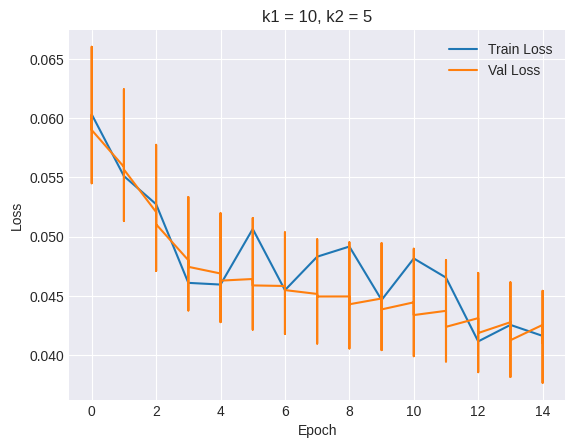

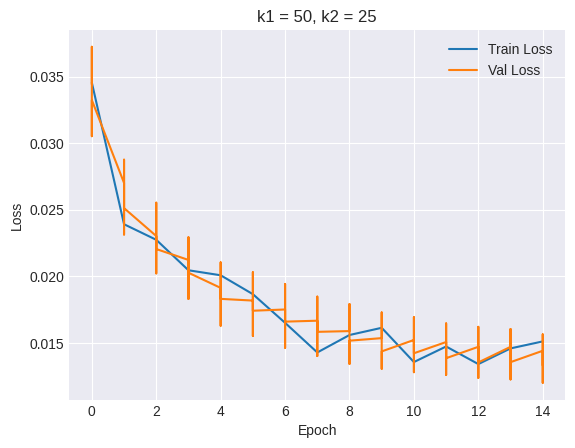

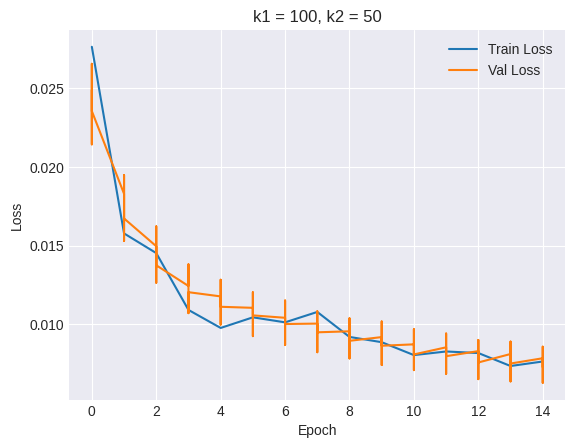

In [ ]:
input_size = 784
num_epochs = 15
import matplotlib.pyplot as plt

k_values = [(10, 5), (50, 25), (100, 50)]
loss_dict = {}

for k1, k2 in k_values:
    print(f"Training stacked autoencoder with k1 = {k1}, k2 = {k2}")
    stacked_autoencoder = StackedAutoencoder(input_size, k1, k2)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(stacked_autoencoder.parameters(), lr=0.001)
    epoch_list_train = []
    loss_list_train = []
    epoch_list_val = []
    loss_list_val = []

    for epoch in range(num_epochs):
        for data, _ in train_loader:
            outputs = stacked_autoencoder(data)
            loss = criterion(outputs, data)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        epoch_list_train.append(epoch)
        loss_list_train.append(loss.item())
        with torch.no_grad():
            for data, _ in val_loader:
                outputs = stacked_autoencoder(data)
                loss_val = criterion(outputs, data)
                loss_list_val.append(loss_val.item())
                epoch_list_val.append(epoch)
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {loss_val.item():.4f}")
    loss_dict[(k1, k2)] = {"epoch_list_train": epoch_list_train, "loss_list_train": loss_list_train, "epoch_list_val": epoch_list_val, "loss_list_val": loss_list_val}
    torch.save(stacked_autoencoder.state_dict(), f"stacked_autoencoder_k1_{k1}_k2_{k2}.pth")

for k1, k2 in k_values:
    loss_dict_k = loss_dict[(k1, k2)]
    fig, ax = plt.subplots()
    ax.plot(loss_dict_k["epoch_list_train"], loss_dict_k["loss_list_train"], label="Train Loss")
    ax.plot(loss_dict_k["epoch_list_val"], loss_dict_k["loss_list_val"], label="Val Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title(f"k1 = {k1}, k2 = {k2}")
    ax.legend()
    plt.show()


<ipython-input-54-03abf30cefcf>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


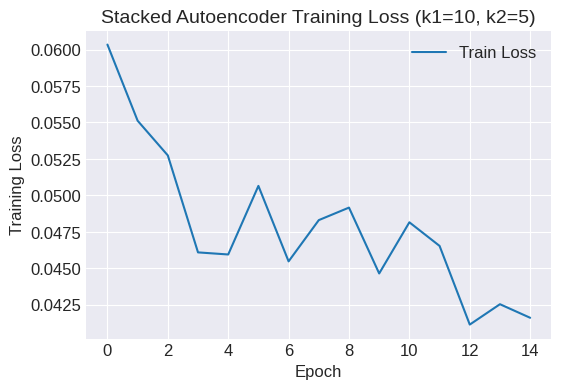

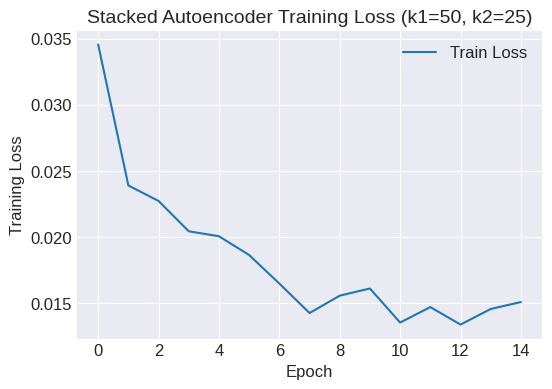

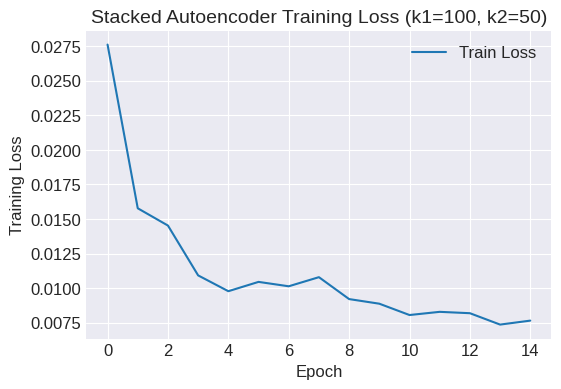

In [ ]:
import matplotlib.pyplot as plt
k_values = [(10, 5), (50, 25), (100, 50)]
plt.style.use('seaborn-darkgrid')
for k1, k2 in k_values:
    epoch_list_train = loss_dict[(k1, k2)]["epoch_list_train"]
    loss_list_train = loss_dict[(k1, k2)]["loss_list_train"]
    fig, ax = plt.subplots()
    ax.plot(epoch_list_train, loss_list_train, label="Train Loss")
    ax.set_xlabel("Epoch", fontsize=12)
    ax.set_ylabel("Training Loss", fontsize=12)
    ax.set_title(f"Stacked Autoencoder Training Loss (k1={k1}, k2={k2})", fontsize=14)
    ax.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    fig.set_size_inches(6, 4)
    fig.savefig(f"train_loss_k1_{k1}_k2_{k2}.pdf", bbox_inches="tight")
    plt.show()

In [ ]:
X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values
X_test = X_test / 255.0
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)
#  DataLoaders
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
test_loss_dict = {}
for k1, k2 in k_values:
    autoencoder = StackedAutoencoder(input_size, k1, k2)
    autoencoder.load_state_dict(torch.load(f"stacked_autoencoder_k1_{k1}_k2_{k2}.pth")) # Assuming you saved the trained models as "stacked_autoencoder_k1_{k1}_k2_{k2}.pth"
    criterion = nn.MSELoss()
    test_loss_list = []
    with torch.no_grad():
        for data, _ in test_loader:
            outputs = autoencoder(data)
            test_loss = criterion(outputs, data)
            test_loss_list.append(test_loss.item())
    test_loss_dict[(k1, k2)] = np.mean(test_loss_list)
    print(f"Test Loss for k1 = {k1}, k2 = {k2}: {test_loss_dict[(k1, k2)]:.4f}")


Test Loss for k1 = 10, k2 = 5: 0.0412
Test Loss for k1 = 50, k2 = 25: 0.0133
Test Loss for k1 = 100, k2 = 50: 0.0070


In [ ]:
import numpy as np

def hessian(x):
    """
    Calculate the hessian matrix with finite differences
    Parameters:
       - x : ndarray
    Returns:
       an array of shape (x.dim, x.ndim) + x.shape
       where the array[i, j, ...] corresponds to the second derivative x_ij
    """
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

x = np.random.randn(100, 100, 100)
hessian(x)

In [ ]:
function = x2